In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
df = pd.read_excel('/Applications/Repos/Repo/expedition/Python/EDA/Flight/flight_price.xlsx')

In [101]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [103]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [104]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [105]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]

In [106]:
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]

In [107]:
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [108]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [109]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [110]:
df['Arrival_hour'] = df['Arrival_Time'].apply (lambda x: x.split(' ')[0]).apply(lambda x: x.split(':')[0])

In [111]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,21


In [112]:
df['Arrival_Min'] = df['Arrival_Time'].apply (lambda x: x.split(' ')[0]).apply(lambda x: x.split(':')[1])

In [113]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,21,35


In [114]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [115]:
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])

In [116]:
df['Dep_Min'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [117]:
df.drop('Dep_Time',axis=1,inplace=True)

In [118]:
df.drop('Route',axis=1,inplace=True)

In [119]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,05,2019,09,25,09,45


In [120]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [121]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [124]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,05,2019,09,25,09,45


In [125]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [129]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)

In [132]:
df['Arrival_Min']=df['Arrival_Min'].astype(int)
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Min']=df['Dep_Min'].astype(int)


In [134]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)


In [136]:
df.drop('Additional_Info',axis=1,inplace=True)

In [137]:
df.head(6)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,21,35,16,50
5,SpiceJet,Kolkata,Banglore,2h 25m,0,3873,24,6,2019,11,25,9,0


In [153]:
df['Duration_hour'] = df['Duration'].apply(lambda x: x.split(' ')[0]).apply(lambda x: x.split('h')[0].strip() if 'h' in x else 0)

In [155]:
df['Duration_Min'] = df['Duration'].apply(lambda x: x.split(' ')[-1]).apply(lambda x: x.split('m')[0].strip() if 'm' in x else 0)

In [160]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_Min'] =df['Duration_Min'].astype(int)


In [163]:
df.drop('Duration',axis=1,inplace=True)

In [164]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,4,45


Which airline offers the cheapest flights on average?

In [169]:
average_price_per_airline = df.groupby('Airline')['Price'].mean().sort_values().round(2)

In [173]:
cheapest_airpline = average_price_per_airline.idxmin()
cheapest_airpline

'Trujet'

In [175]:
cheapest_price = average_price_per_airline.min()
cheapest_price

np.float64(4140.0)

Which airline has the most expensive flights?

In [177]:
expensive_airpline = average_price_per_airline.idxmax()
expensive_airpline

'Jet Airways Business'

How does price vary across airlines?

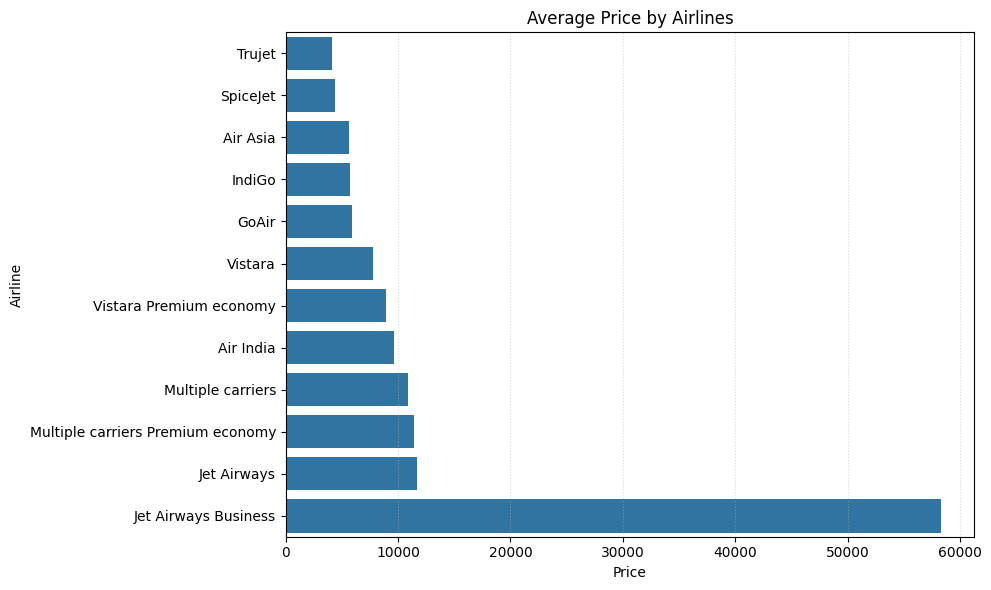

In [196]:
plt.figure(figsize=(10,6))
sns.barplot(y=average_price_per_airline.index,x=average_price_per_airline.values)
plt.title('Average Price by Airlines')
plt.xlabel('Price')
plt.ylabel('Airline')
plt.grid(True,axis='x',linestyle='dotted',alpha=0.5)
plt.tight_layout()
plt.show()

Are there any airlines that only operate non-stop or 1-stop flights?

In [208]:
# Step 1: Get the unique Total_Stops per airline

airline_stops = df.groupby('Airline')['Total_Stops'].unique()

# airlines with either 0 or 1 stops 

limited_stop_airline = airline_stops[airline_stops.apply(lambda x: set(x).issubset({0,1}))]
print("Airlines that only operate non-stop or 1-stop flights:")
print(limited_stop_airline)

Airlines that only operate non-stop or 1-stop flights:
Airline
GoAir                                [1, 0]
Multiple carriers Premium economy       [1]
SpiceJet                             [0, 1]
Trujet                                  [1]
Vistara                              [0, 1]
Vistara Premium economy                 [0]
Name: Total_Stops, dtype: object


Which routes (source → destination) are the most popular?

In [220]:
route_counts = df.groupby(['Source','Destination']).size()
route_counts

Source    Destination
Banglore  Delhi          1265
          New Delhi       932
Chennai   Kolkata         381
Delhi     Cochin         4537
Kolkata   Banglore       2871
Mumbai    Hyderabad       697
dtype: int64